<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-03-05 20:45:49--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  47.0MB/s    in 4.3s    

2025-03-05 20:45:56 (47.3 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


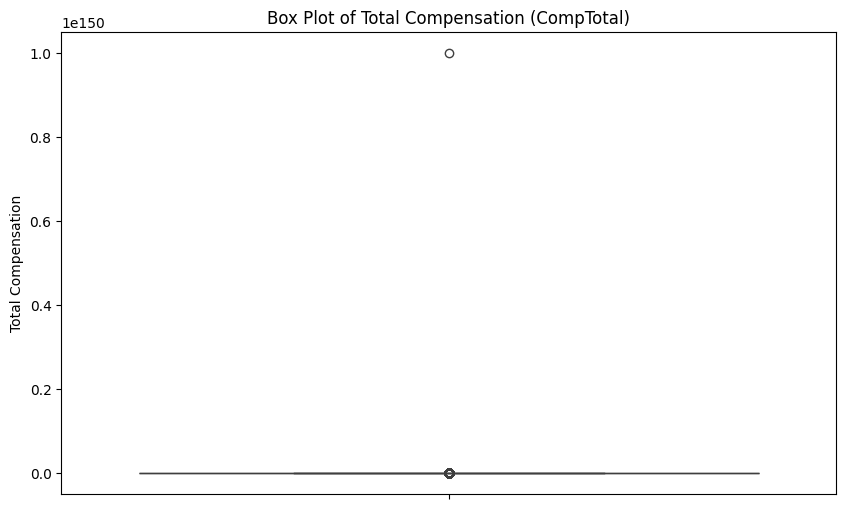

In [8]:
# your code goes here

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get CompTotal
QUERY = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)

# Create box plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(y='CompTotal', data=df)
plt.title('Box Plot of Total Compensation (CompTotal)')
plt.ylabel('Total Compensation')
plt.show()

# Close the connection
conn.close()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


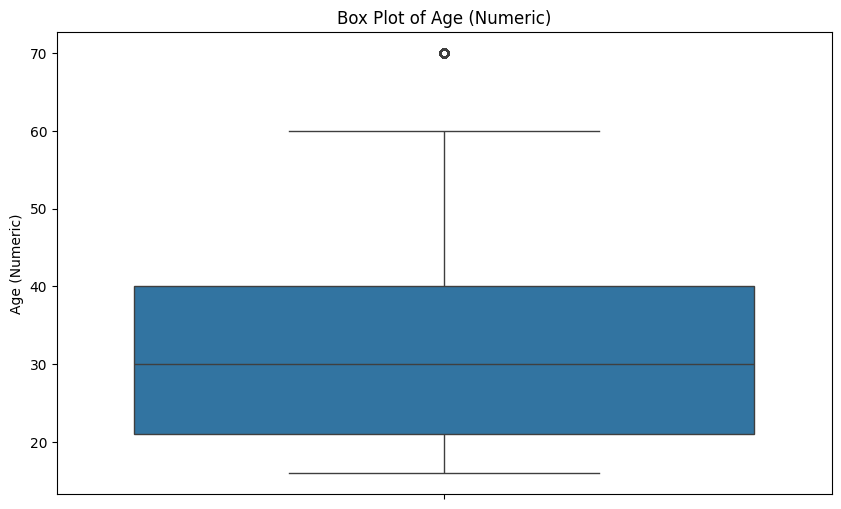

In [9]:
# your code goes here

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get Age
QUERY = "SELECT Age FROM main WHERE Age IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)

# Convert Age to numeric
age_mapping = {
    'Under 18 years old': 16,  # Approximate value
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70  # Approximate value
}

df['Age_Numeric'] = df['Age'].map(age_mapping)

# Remove rows with NaN (if any mapping failed)
df = df.dropna(subset=['Age_Numeric'])

# Create box plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(y='Age_Numeric', data=df)
plt.title('Box Plot of Age (Numeric)')
plt.ylabel('Age (Numeric)')
plt.show()

# Close the connection
conn.close()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


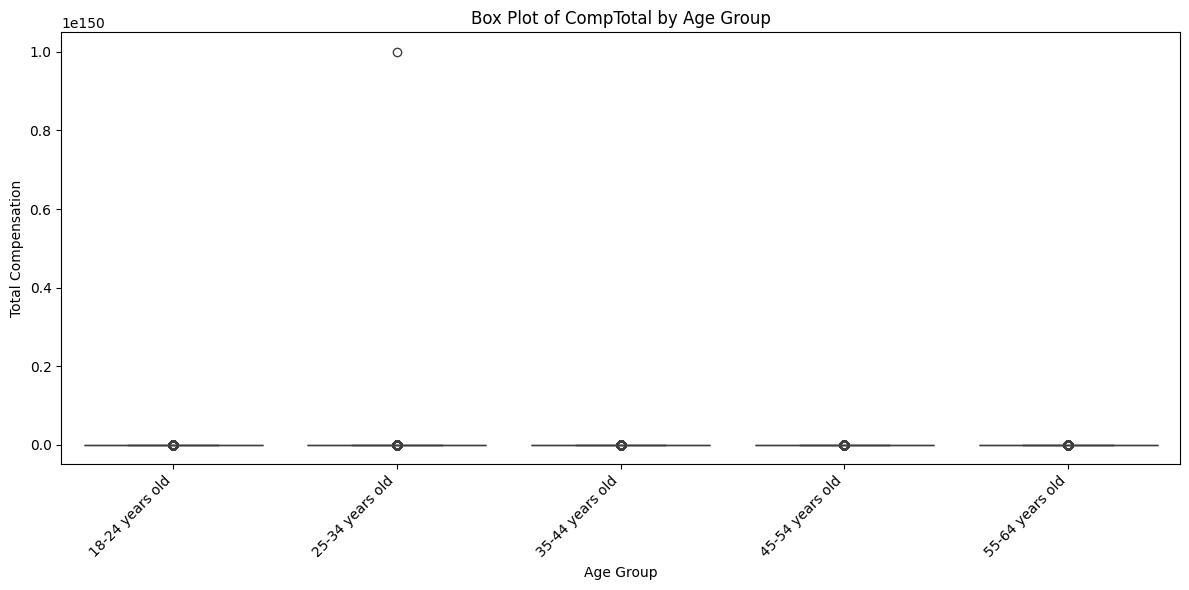

In [10]:
# your code goes here

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get CompTotal and Age
QUERY = """
SELECT CompTotal, Age
FROM main
WHERE CompTotal IS NOT NULL AND Age IN ('18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old')
"""
df = pd.read_sql_query(QUERY, conn)

# Create box plot using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='CompTotal', data=df)
plt.title('Box Plot of CompTotal by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()

# Close the connection
conn.close()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


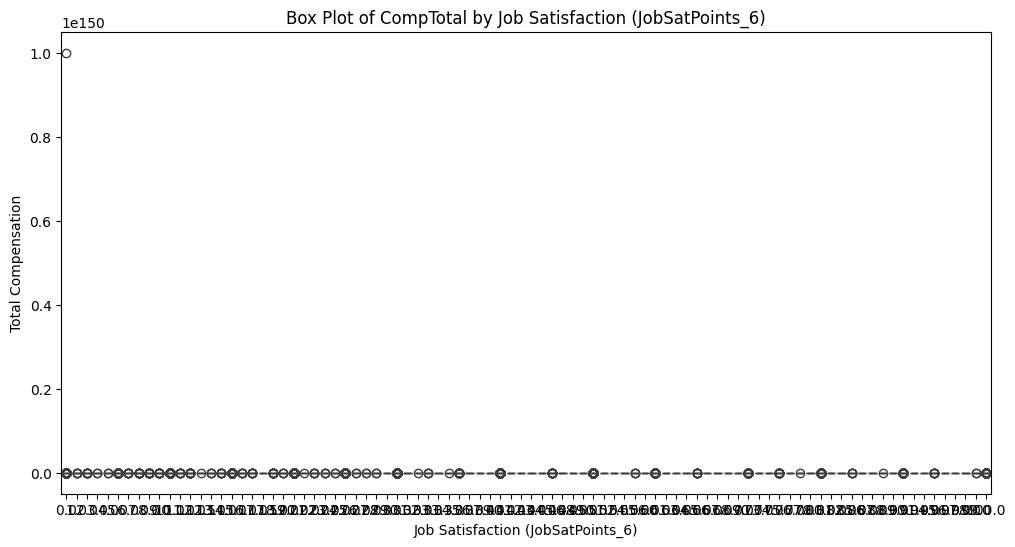

In [11]:
# your code goes here

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get CompTotal and JobSatPoints_6
QUERY = """
SELECT CompTotal, JobSatPoints_6
FROM main
WHERE CompTotal IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Create box plot using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=df)
plt.title('Box Plot of CompTotal by Job Satisfaction (JobSatPoints_6)')
plt.xlabel('Job Satisfaction (JobSatPoints_6)')
plt.ylabel('Total Compensation')
plt.show()

# Close the connection
conn.close()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


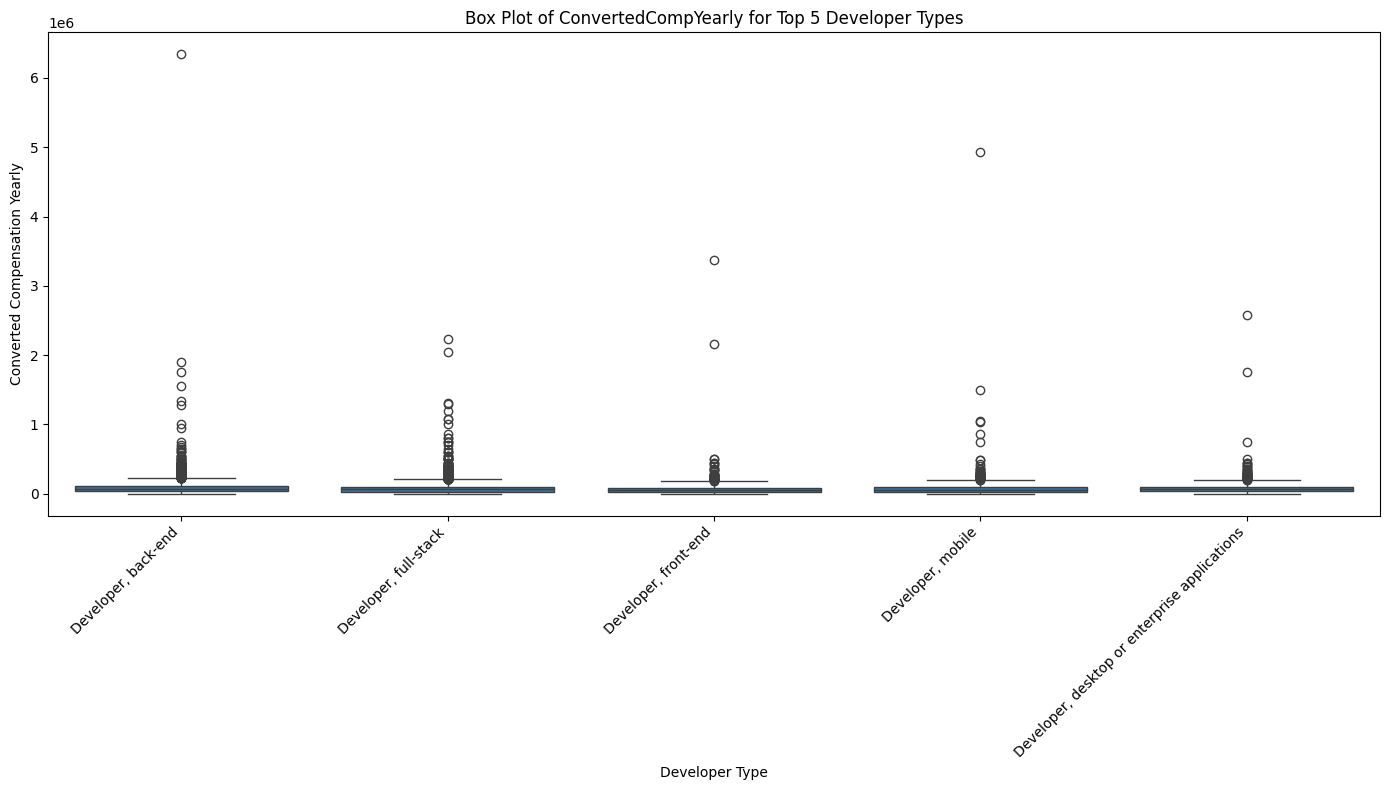

In [13]:
# your code goes here

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get ConvertedCompYearly and DevType
QUERY = """
SELECT ConvertedCompYearly, DevType
FROM main
WHERE ConvertedCompYearly IS NOT NULL AND DevType IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Split DevType and count occurrences
dev_type_counts = pd.Series(
    [dev.strip() for dev_types in df['DevType'].dropna()
     for dev in dev_types.split(';')]
).value_counts().nlargest(5)

# Filter DataFrame for top 5 developer types
top_dev_types = dev_type_counts.index.tolist()
df_top_devs = df[df['DevType'].apply(lambda dev_types: any(dev.strip() in top_dev_types for dev in dev_types.split(';')))]

# Create box plot using seaborn
plt.figure(figsize=(14, 8))
sns.boxplot(x='DevType', y='ConvertedCompYearly', data=df_top_devs)
plt.title('Box Plot of ConvertedCompYearly for Top 5 Developer Types')
plt.xlabel('Developer Type')
plt.ylabel('Converted Compensation Yearly')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Close the connection
conn.close()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


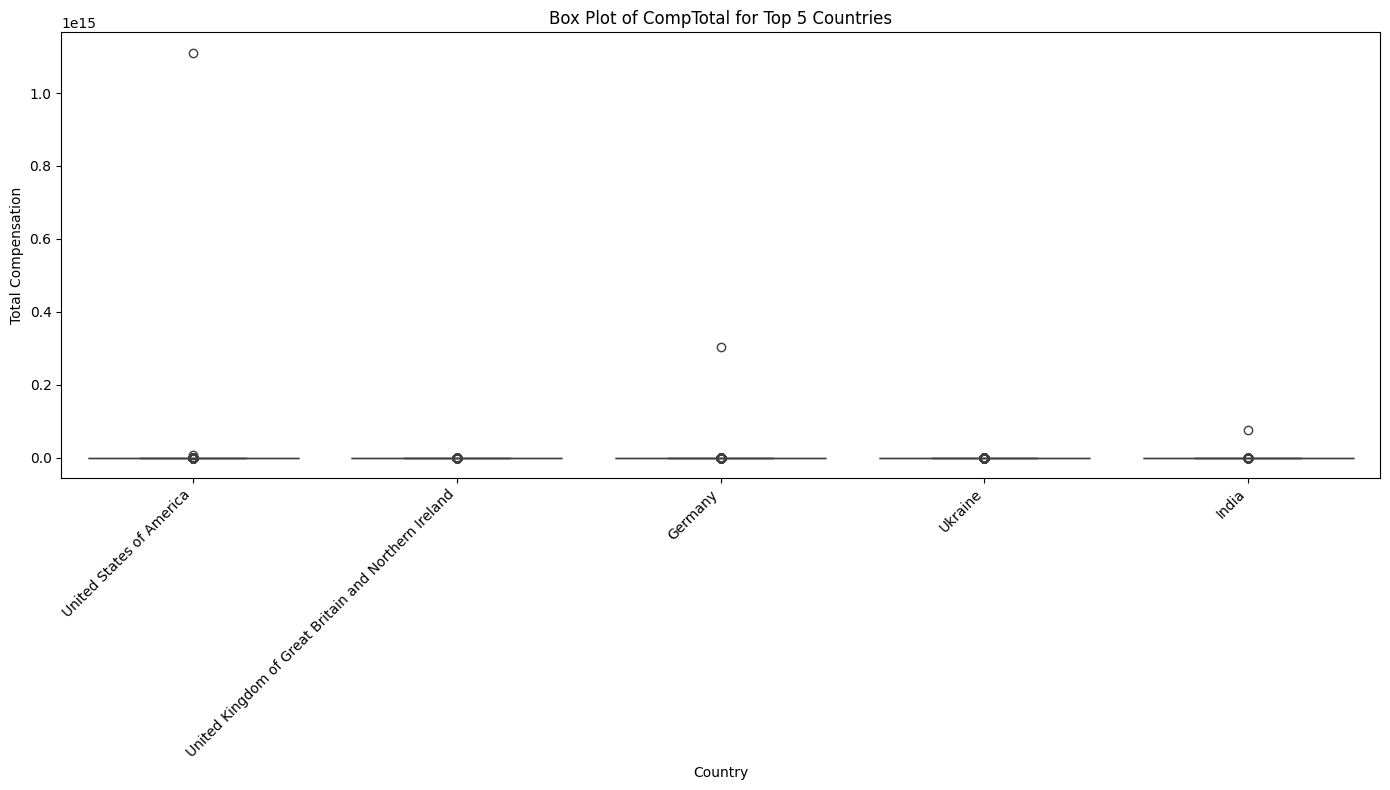

In [14]:
# your code goes here

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get CompTotal and Country
QUERY = """
SELECT CompTotal, Country
FROM main
WHERE CompTotal IS NOT NULL AND Country IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Get the top 5 countries by frequency
top_countries = df['Country'].value_counts().nlargest(5).index.tolist()

# Filter DataFrame for top 5 countries
df_top_countries = df[df['Country'].isin(top_countries)]

# Create box plot using seaborn
plt.figure(figsize=(14, 8))
sns.boxplot(x='Country', y='CompTotal', data=df_top_countries)
plt.title('Box Plot of CompTotal for Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Close the connection
conn.close()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_299/313823688.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


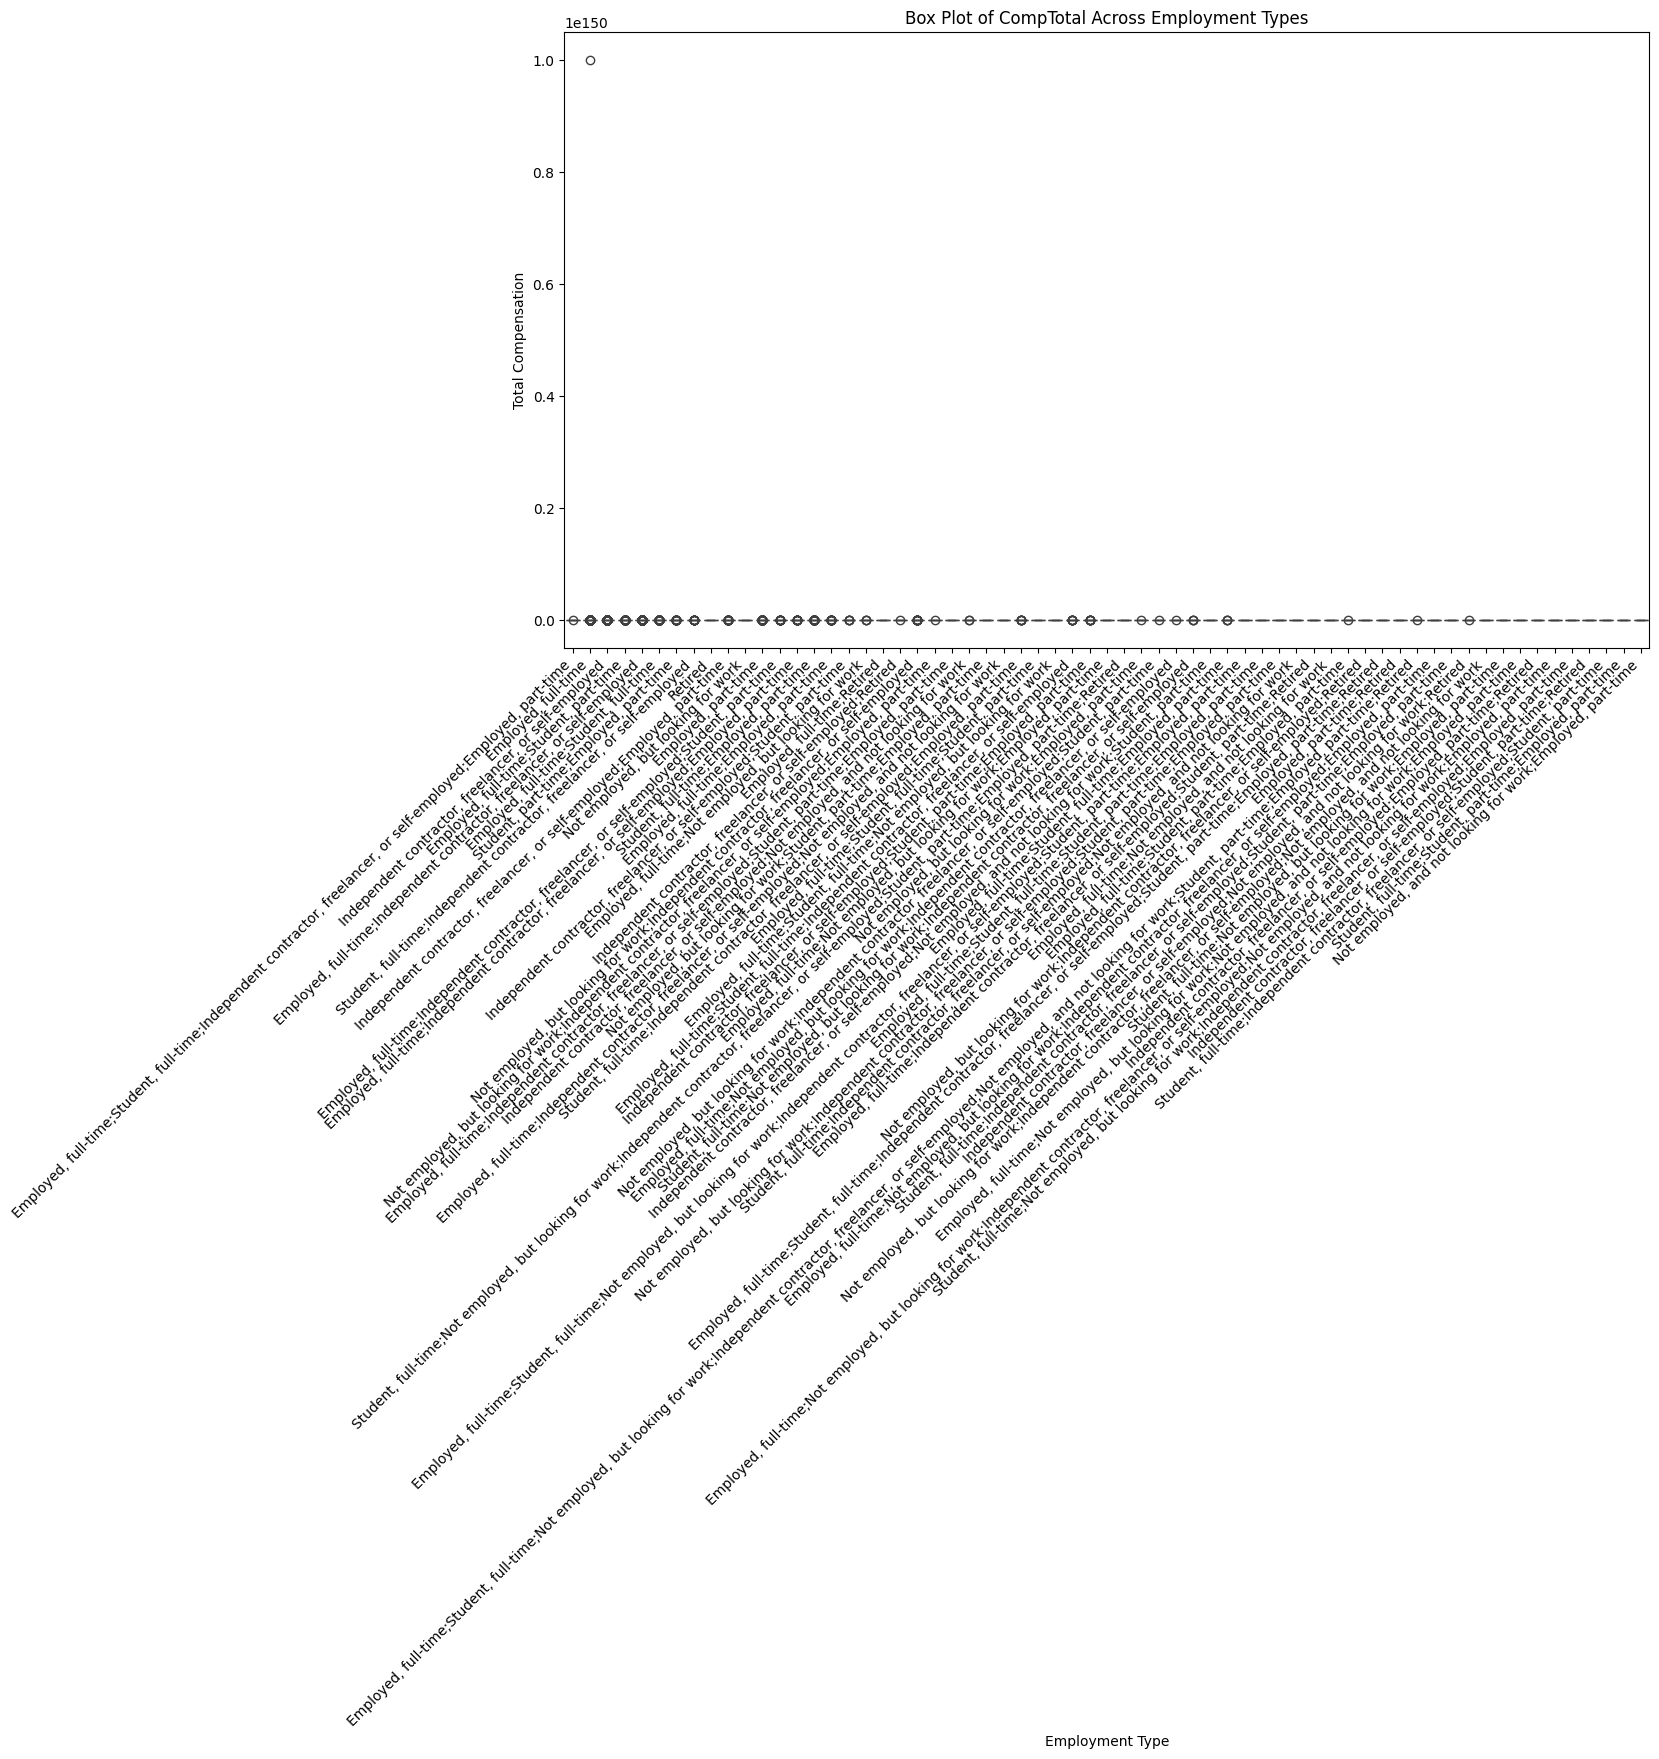

In [15]:
# your code goes here

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get CompTotal and Employment
QUERY = """
SELECT CompTotal, Employment
FROM main
WHERE CompTotal IS NOT NULL AND Employment IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Create box plot using seaborn
plt.figure(figsize=(14, 8))
sns.boxplot(x='Employment', y='CompTotal', data=df)
plt.title('Box Plot of CompTotal Across Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Close the connection
conn.close()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [ ]:
# your code goes here

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to get YearsCodePro and JobSatPoints_6
QUERY = """
SELECT YearsCodePro, JobSatPoints_6
FROM main
WHERE YearsCodePro IS NOT NULL AND JobSatPoints_6 IS NOT NULL
AND YearsCodePro != 'Less than 1 year' AND YearsCodePro != 'More than 50 years'
"""
df = pd.read_sql_query(QUERY, conn)

# Clean and convert 'YearsCodePro' to numeric
def clean_years_code(years):
    try:
        return float(years)
    except ValueError:
        return None

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_years_code)
df = df.dropna()

# Create box plot using seaborn
plt.figure(figsize=(14, 8))
sns.boxplot(x='JobSatPoints_6', y='YearsCodePro', data=df)
plt.title('Box Plot of YearsCodePro by Job Satisfaction (JobSatPoints_6)')
plt.xlabel('Job Satisfaction (JobSatPoints_6)')
plt.ylabel('Years of Professional Coding Experience')
plt.show()

# Close the connection
conn.close()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
